Name: Willard Ford

Group number: 6

# Instructions:
**To start working on this Homework Assignment, create a copy of this notebook and save it within your Google Drive (File -> Save a copy in Drive).**

This Jupyter notebook contains 3 exercises consisting of coding and discussion questions. For the discussion questions, please write your answer inside a new text cell. Please hand in your .ipynb file (File -> Download -> Download .ipynb) on canvas by 8pm on **May 5th**.

To execute the code, it is necessary to load some external packages, so please execute the following code block.

While you should work in a group, please answer in the discussion sections individually.

In [2]:
# @title Install packages
import numpy as np
from numpy import random
import scipy.signal as sps
import matplotlib.pyplot as plt
import itertools

# Q1

### 1.0
* Simulate the spiking activity of a presynaptic neuron, which will serve as input to a postsynaptic neuron.

The presynaptic neuron should have firing rate $r=10Hz$ (use time bins of $\Delta t=1ms$, and assume that the neuron randomly produces either one spike or no spikes in each bin).

---
Hint: Read page 30 of Theoretical Neuroscience by Dayan & Abbott.

---

0.99
49


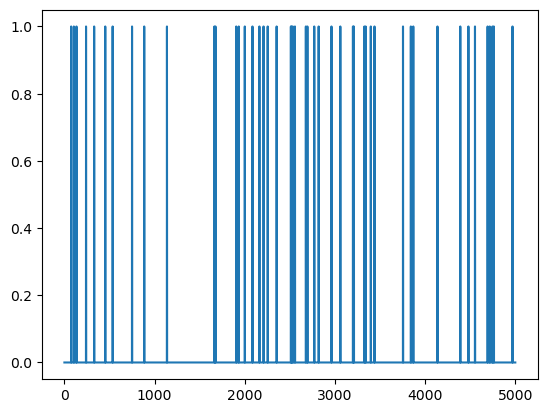

In [28]:
dt = 1        # timestep in msec 
r  = 10         # presynaptic firing rate in Hz
T  = 5000       # total number of timesteps in simulation
N  = 1          # number of presynaptic neurons
# create matrix S_pre with N columns and T rows. each entry should be 0 (no spike) or 1 (spike) chosen randomly. 
# choose the probability of each entry being 1 such that the presynaptic neuron has a firing rate r.

# you can start with a matrix S with each entry sampled from a uniform distribution between 0 and 1.
# then set all the entries below some value to 0 and all the entries above that value to 1.
# think about how that value is related to the firing rate r and the timestep dt.
S_pre = [random.uniform(size=T)*N]
x_rand = 1-r*(dt/1000)
spikes = [1 if (x > x_rand) else 0 for x in S_pre[0]]
print(x_rand)
#print(spikes)
print(sum(spikes))
plt.plot(spikes)


### 1.1
Use the Tsodyks-Markram model to simulate the synaptic resources, in two scenarios.
* Scenario 1: Short-term depression. No facilitation ($U=0.5$ is constant); $\tau_{in}=3ms$; $\tau_{rec} = 800ms$.
* Scenario 2: Short-term facilitation and depression. $U_1=0.03$; $\tau_{facil} = 530ms$; $\tau_{in}=1.5ms$; $\tau_{rec} = 130ms$.

Plot the input spike train and the state variables of the synapse as a function of time (x, y, z in Scenario 1; x, y, z, U in Scenario 2).

---
Reminder:

$$
\begin{aligned}
\frac{\mathrm{d} x}{\mathrm{~d} t} &=\frac{z}{\tau_{\text {rec }}}-U x \delta\left(t-t_{i}\right) \\
\frac{\mathrm{d} y}{\mathrm{~d} t} &=-\frac{y}{\tau_{\text {in }}}+U x \delta\left(t-t_{i}\right) \\
\frac{\mathrm{d} z}{\mathrm{~d} t} &=\frac{y}{\tau_{\text {in }}}-\frac{z}{\tau_{\text {rec }}} \\
\frac{\mathrm{d} U}{\mathrm{~d} t} &=-\frac{U}{\tau_{\text {facil }}}+U_{1}(1-U) \delta\left(t-t_{i}\right)
\end{aligned}
$$



In [29]:
# Scenario 1
xSTP = np.zeros([N,T]) # recovered synaptic resources for N neurons during nT timesteps
ySTP = np.zeros([N,T]) # active    synaptic resources for N neurons during nT timesteps
zSTP = np.zeros([N,T]) # inactive  synaptic resources for N neurons during nT timesteps

xSTP[:,0] = 1 # set the initial condition of x. remember that x + y + z = 1

T_in = 3
T_rec = 800
U = 0.5
for i in range(N):
    for t in range(T-1):
        # Use the equations and the matrix of presynaptic activity you computed in Q1.0 to update x, y, z
        dx = zSTP[i,t]/T_rec - U*xSTP[i,t]*spikes[t]
        dy = -ySTP[i,t]/T_in + U*xSTP[i,t]*spikes[t]
        dz = ySTP[i,t]/T_in - zSTP[i,t]/T_rec
        
        xSTP[i, t+1] = xSTP[i,t] + dt * dx
        ySTP[i, t+1] = ySTP[i,t] + dt * dy
        zSTP[i, t+1] = zSTP[i,t] + dt * dz
                

In [30]:
# all reshape is for visualization purposes
x = xSTP.reshape(5000,)
y = ySTP.reshape(5000,)
z = zSTP.reshape(5000,)


# PLOT - TOGETHER AS IN BELOW SAMPLE CODE OR IN SUBPLOTS USING TEMPLATE FROM HW1
plt.plot(time, S_pre, label='SpikeTrain')
plt.plot(..., ..., label='x')
plt.plot(..., ..., label='y')
plt.plot(..., ..., label='z')
plt.legend()
plt.title('TITLE GOES HERE')
plt.xlabel("Time (s)")

NameError: name 'time' is not defined

In [ ]:
# Scenario 2
xSTP = np.zeros([N,T]) # recovered synaptic resources for N neurons during nT timesteps
ySTP = np.zeros([N,T]) # active    synaptic resources for N neurons during nT timesteps
zSTP = np.zeros([N,T]) # inactive  synaptic resources for N neurons during nT timesteps
USTP = np.zeros([N,T]) # inactive  synaptic resources for N neurons during nT timesteps

x[:,0] = ... # set the initial condition of x. remember that x + y + z = 1

for i in range(N):
    for t in range(T-1):
        # Use the equations and the matrix of presynaptic activity you computed in Q1.0 to update x, y, z, U 
        dx = ...
        dy = ...
        dz = ...
        dU = ... 
        
        xSTP[i, t+1] = xSTP[i,t] + dt * dx
        ySTP[i, t+1] = ySTP[i,t] + dt * dy
        zSTP[i, t+1] = zSTP[i,t] + dt * dz
        USTP[i, t+1] = USTP[i,t] + dt * dU


### 1.2
Generate $N=10$ input spike trains and simulate a leaky integrate and fire neuron driven by these inputs,
* when the synapses are constant (current-based synapses),
* when synapses follow the Tsodyks-Markram model (Scenario 1),
* when synapses follow the Tsodyks-Markram model (Scenario 2).

Choose the synaptic weight parameter $w$ such that the output firing rate is approximately $10Hz$.
Plot the output spike trains in each case.

In [ ]:
# Scenario 1:
Vth   = 1     # LIF Voltage threshold
Vr    = 0     # LIF Voltage reset
tref  = 2     # LIF number of timepoints for refractory period
dt    = 0.1   
T     = 20000 # LIF Total number of timepoints to simulate

t  = np.arange(start=0.0, stop=T, step=dt)
Lt = np.size(t)

N  = 10     # number of input signals to generate
fr = ...    # firing rate of each input neuron

V_out      = np.zeros_like(t)
S_out      = np.zeros_like(t)

S_in       = np.zeros([Lt, N])
xSTP       = np.zeros([Lt, N])
ySTP       = np.ones([Lt, N])
zSTP       = np.zeros([Lt, N])
# USTP       = np.zeros([Lt, N])

taurec     = 20
tauin      = 5
USE        = 0.5

# Generate N=10 input spike signals
S_in = 

# synaptic weight
W = ... # This is something that you are toggling

tr = 0
for it in range(Lt-1):
    
    # STP update step
    for i in range(N):
        dx = ...
        dy = ...
        dz = ...

        xSTP[it+1,i] = xSTP[it,i]+dx*dt
        ySTP[it+1,i] = ySTP[it,i]+dy*dt
        zSTP[it+1,i] = zSTP[it,i]+dz*dt
    
    # LIF update step
    if tr > 0:
        V_out[it] = Vr
        tr    = tr-1
        
    elif V_out[it]>=Vth:
        S_out[it] = 1
        V_out[it] = Vr
        tr = tref/dt
        
    dV = ...
    V_out[it+1] = V_out[it]+dV*dt

print('Output frequency:')
print(np.sum(S_out)/T*1000)



In [ ]:
# Scenario 2:

### 1.3
Can you determine based on the output spike-train whether the synapses are constant / short-term depression (Scenario 1) / short-term facilitation and depression (Scenario 2)?

If yes, what properties of the spike train can you use to determine which synapse model was used?

If not, how would you change the parameters of the simulation so that different synapse models will lead to output spike trains that can be distinguished?

---
Hints:

* How does the relative contribution of each input depend on the total number of inputs N? 

* What is the ﬁring rate of each input relative to the diﬀerent timescales, and speciﬁcally the recovery and facilitation timescales?

* Is the output ﬁring rate constant in each scenario?

* Does the inter-spike-interval distribution tell us anything about the synaptic dynamics?

---

# Q2

### 2.1

Suppose a neuron has the following f-I curve for different levels of input noise ($f$ is measured in $Hz$):

$$
f_{\sigma}(I)= \begin{cases}\sigma & I<1 \\ \sigma+\sqrt{I-1} & I \geq 1\end{cases}
$$

Recall the self-consistency equation we derived in class for the output of a neuron in an all-to-all network with weak synapses (synaptic weight$ = w/N$, which implies $\sigma=0$).

$$\phi = f_0(w\phi)$$

* Plot the firing rate $\phi$ as a function of the synaptic weight parameter $w$ which solves this equation.

  What is the minimum synaptic weight required for activity in the network?



In [ ]:
# start by defining the function f
def f(I):
    return np.sqrt(np.maximum(0,I-1))

# next define a range of values of w
w = ...

# for each w, find phi that solves the equation phi = f(w*phi)
# you can use the function fsolve
# alternatively, you can find phi which minimizes abs(phi-f(w*phi)), 
# since that expression will be minimal at 0 when the equation is solved.

### 2.2
* When synapses in the network undergo short-term depression, we found a modified version of this self-consistency equation
$$
\phi=f_{0}(w \phi\langle y\rangle)
$$
where $\langle y \rangle$ is the average amount of synaptic resources in the network
$$
\langle y\rangle=\tau_{\text {in }} U\langle x\rangle \phi.
$$
  We also derived an equation for the average amount of recovered resources
$$
\frac{\mathrm{d}\langle x\rangle}{\mathrm{d} t}=\frac{1-\langle x\rangle}{\tau_{\text {rec }}}-U\langle x\rangle \phi.
$$
For the parameters of Scenario 1 in Q1, what are the steady state values of $\langle x \rangle$ and $\langle y \rangle$ as a function of $\phi$?

* How does the short term depression affect the minimal synaptic weight needed for activity in the network?

---
Hint: 
Substitute $\langle y \rangle$ with the relationship you found into the modiﬁed self-consistency equation, and solve it numerically. Note that a short inactivation timescale $\tau_{\rm in}$ implies that $\langle y \rangle$ is small, as discussed in class. This means that the relevant range of $w$ values might be different compared to the case with no short term depression.

---

In [ ]:
# use the same code as in Q2.1, but modify the argument of the function f

# Q3
### 3.1
* Generate a random adjacency matrix for a network with $N=500$ neurons, connectivity parameter $p=0.1$, and no self connections ($A_{ii}=0$)

* Plot the in-degree and out-degree distributions. Do they agree with the formula we found in class?





In [ ]:
# sample code to generate a random adjacency matrix
N = 10   # number of nodes
p = 0.1   # probability of a connection


adj = random.randint(0,2,(N,N))

adj = ... # code to subtract the diagonal (no self connections)



### 3.2
* Choose 2 of the 13 possible 3-neuron motifs and compute the probability of their appearance in the network.

  Hint: you can loop over all the neurons in the network 3 times, and based on $A_{ij}, A_{ji}, A_{jk}, A_{kj}, A_{ki}, A_{ik}$ determine if each neuron triplet has a motif or not.

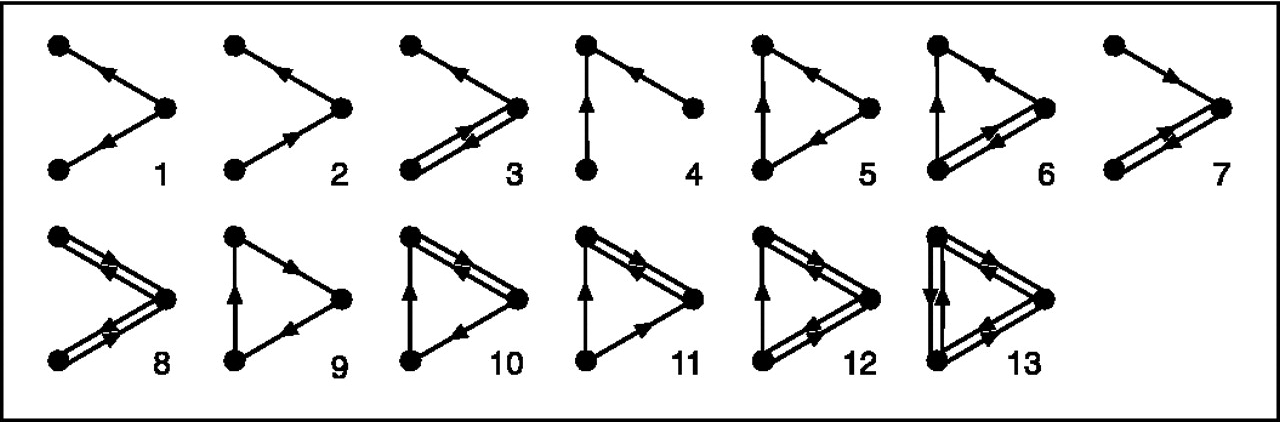

Compare the probabilities of the motifs to what you would expect based on the calcluation done in class for the loop motif (motif 9).

